In [49]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
import h5py
import scipy



In [50]:
def get_files(file_dir):
    nike = []
    label_nike = []
    #puma = []
    #label_puma = []
    adidas = []
    label_adidas = []
    
    for file in os.listdir(file_dir+'/nike'):
        nike.append(file_dir+'/nike'+'/'+file)
        label_nike.append(0)
    #for file in os.listdir(file_dir+'/puma'):
        #puma.append(file_dir+'/puma'+'/'+file)
        #label_puma.append(1)
    for file in os.listdir(file_dir+'/adidas'):
        adidas.append(file_dir+'/adidas'+'/'+file)
        label_adidas.append(1)
        
    image_list = np.hstack((nike,adidas))
    label_list = np.hstack((label_nike,label_adidas))

    temp = np.array([image_list, label_list])
    temp = temp.transpose()
    np.random.shuffle(temp)

    image_list = list(temp[:,0])
    label_list = list(temp[:,1])
    label_list = [int(i) for i in label_list]

    return image_list,label_list

In [51]:
train_dir = '/home/xiepeng/visionoffootballshoes/22/footballshoes'
image_list,label_list = get_files(train_dir)  
  
print(len(image_list))  
print(len(label_list)) 

3011
3011


In [52]:
Train_image =  np.random.rand(len(image_list)-450, 64, 64, 3).astype('float32')  
Train_label = np.random.rand(len(image_list)-450, 1).astype('float32')  
  
Test_image =  np.random.rand(450, 64, 64, 3).astype('float32')  
Test_label = np.random.rand(450, 1).astype('float32') 

In [53]:
f = h5py.File('data1.h5', 'w')  
f.create_dataset('X_train', data=Train_image)  
f.create_dataset('y_train', data=Train_label)  
f.create_dataset('X_test', data=Test_image)  
f.create_dataset('y_test', data=Test_label)  
f.close() 

In [54]:
train_dataset = h5py.File('data1.h5', 'r')  
train_set_x_orig = np.array(train_dataset['X_train'][:]) # your train set features  
train_set_y_orig = np.array(train_dataset['y_train'][:]) # your train set labels  
test_set_x_orig = np.array(train_dataset['X_test'][:]) # your train set features  
test_set_y_orig = np.array(train_dataset['y_test'][:]) # your train set labels  
f.close()  

In [55]:
print(train_set_x_orig.shape)  
print(train_set_y_orig.shape)  
  
print(train_set_x_orig.max())  
print(train_set_x_orig.min())  
  
print(test_set_x_orig.shape)  
print(test_set_y_orig.shape)

(2561, 64, 64, 3)
(2561, 1)
1.0
6.1350653e-09
(450, 64, 64, 3)
(450, 1)


[0.9113521]


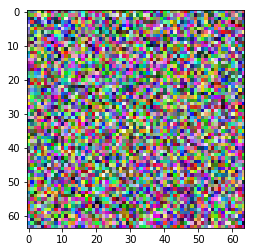

In [56]:
plt.imshow(train_set_x_orig[221])  
print(train_set_y_orig[221]) 

In [57]:
import numpy as np  
#import tensorflow as tf  
from keras import layers  
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D  
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D  
from keras.models import Model  
from keras.preprocessing import image  
from keras.utils import layer_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
import pydot  
from IPython.display import SVG  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.utils import np_utils
  
import keras.backend as K  
K.set_image_data_format('channels_last')  
import matplotlib.pyplot as plt  
from matplotlib.pyplot import imshow  
  
  
import os  
import numpy as np  
from PIL import Image  
import tensorflow as tf  
import sklearn  
from sklearn import preprocessing  
import h5py  
import scipy  
#导入必要的包  
%matplotlib inline

In [42]:
# 二、导入 hdf5 数据集  
#我的图片大小为（64*64*3）  
train_dataset = h5py.File('data1.h5', 'r')  
X_train = np.array(train_dataset['X_train'][:]) # your train set features  
Y_train = np.array(train_dataset['y_train'][:]) # your train set labels  
#Y_train = np_utils.to_categorical(Y_train, 3)
X_test = np.array(train_dataset['X_test'][:]) # your train set features  
Y_test = np.array(train_dataset['y_test'][:]) # your train set labels  
train_dataset.close()

In [59]:
print ("number of training examples = " + str(X_train.shape[0]))  
print ("number of test examples = " + str(X_test.shape[0]))  
print ("X_train shape: " + str(X_train.shape))  
print ("Y_train shape: " + str(Y_train.shape))  
print ("X_test shape: " + str(X_test.shape))  
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 2561
number of test examples = 450
X_train shape: (2561, 64, 64, 3)
Y_train shape: (2561, 1)
X_test shape: (450, 64, 64, 3)
Y_test shape: (450, 1)


In [60]:
#三、建立模型  
# GRADED FUNCTION: TumbleModel  
      
def TumbleModel(input_shape):  
        """ 
        Implementation of the HappyModel. 
         
        Arguments: 
        input_shape -- shape of the images of the dataset 
     
     
        Returns: 
        model -- a Model() instance in Keras 
        """  
          
        ### START CODE HERE ###  
        # Feel free to use the suggested outline in the text above to get started, and run through the whole  
        # exercise (including the later portions of this notebook) once. The come back also try out other  
        # network architectures as well.   
        X_input = Input(shape=input_shape)  
        X = ZeroPadding2D(padding=(1, 1))(X_input)  
        X = Conv2D(8, kernel_size=(3,3), strides=(1,1))(X)  
        X = BatchNormalization(axis=3)(X)  
        X = Activation('relu')(X)  
        X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)   #32*32*8  
          
        X = ZeroPadding2D(padding=(1, 1))(X)  
        X = Conv2D(16, kernel_size=(3,3), strides=(1,1))(X)                     #32*32*16  
        X = BatchNormalization(axis=3)(X)  
        X = Activation('relu')(X)  
        X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)   #16*16*16  
          
        X = ZeroPadding2D(padding=(1, 1))(X)  
        X = Conv2D(32, kernel_size=(3,3), strides=(1,1))(X)                 #16*16*32  
        X = BatchNormalization(axis=3)(X)  
        X = Activation('relu')(X)  
        X = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(X)     #8*8*32  
          
        # FC  
        X = Flatten()(X)  
        Y = Dense(1, activation='sigmoid')(X)  
          
        model = Model(inputs = X_input, outputs = Y, name='TumbleModel')  
        ### END CODE HERE ###  
          
        return model  



In [61]:
tumbleModel = TumbleModel((64, 64, 3)) 

In [62]:
import keras  
tumbleModel.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])  

In [63]:
tumbleModel.fit(x=X_train, y=Y_train, batch_size=16, epochs=20)

Epoch 1/20
2561/2561 [==============================] - 24s 9ms/step - loss: 0.7842 - acc: 0.0000e+00
Epoch 2/20
2561/2561 [==============================] - 23s 9ms/step - loss: 0.6683 - acc: 0.0000e+00
Epoch 3/20
2561/2561 [==============================] - 23s 9ms/step - loss: 0.6323 - acc: 0.0000e+00
Epoch 4/20
2561/2561 [==============================] - 23s 9ms/step - loss: 0.5993 - acc: 0.0000e+00
Epoch 5/20
2561/2561 [==============================] - 23s 9ms/step - loss: 0.5780 - acc: 0.0000e+00
Epoch 6/20
2561/2561 [==============================] - 23s 9ms/step - loss: 0.5599 - acc: 0.0000e+00
Epoch 7/20
2561/2561 [==============================] - 23s 9ms/step - loss: 0.5505 - acc: 0.0000e+00
Epoch 8/20
2561/2561 [==============================] - 22s 9ms/step - loss: 0.5526 - acc: 0.0000e+00
Epoch 9/20
2561/2561 [==============================] - 22s 9ms/step - loss: 0.5350 - acc: 0.0000e+00
Epoch 10/20
2561/2561 [==============================] - 23s 9ms/step - loss: 0.53

In [64]:
#Y_test = np_utils.to_categorical(Y_test, 3)
preds = tumbleModel.evaluate(x=X_test, y=Y_test)  
print()  
print ("Loss = " + str(preds[0]))  
print ("Test Accuracy = " + str(preds[1])) 

450/450 [==============================] - 2s 4ms/step

Loss = 0.8508673283788893
Test Accuracy = 0.0


In [ ]:
img_path = '/home/xiepeng/thumb_80_0_20170209044031604.jpg'  
img = image.load_img(img_path, target_size=(64, 64))  
imshow(img)  
  
  
x = image.img_to_array(img)  
x = np.expand_dims(x, axis=0)  
x = preprocess_input(x)  
  
print(tumbleModel.predict(x))  

In [22]:
import cv2 as cv
